In [19]:
import numpy
import matplotlib.pyplot as plt

In [5]:
def countCXs(label):
    return 2*(countGates(label)-1)
#Gate counting                                                                          g
def countYgates(pauli_label):
    countYgates = sum(map(lambda x : 1 if 'Y' in x else 0, pauli_label))
    return countYgates
def countZgates(pauli_label):
    countZgates = sum(map(lambda x : 1 if 'Z' in x else 0, pauli_label))
    return countZgates
def countXgates(pauli_label):
    countXgates = sum(map(lambda x : 1 if 'X' in x else 0, pauli_label))
    return countXgates
def countGates(pauli_label):
    return countXgates(pauli_label)+countYgates(pauli_label)+countZgates(pauli_label)

In [6]:
Eg=-19.18498504086919

In [7]:
# #results from HVA statevector
U=7
EnergyArrHVAcomp=[]
paramsArr=[]
with open('../'+str(U)+'/FinalDataFiles/HVA-opt-SMO&AdaDelta/SMOforHVA.txt','r') as f:
    lines=f.readlines()
    data=lines[0].split('#')
    Len=len(eval(data[0]))
    points=[]
    EnergyArrHVAcomp.append(float(data[1]))
    paramsArr.append(eval(data[0]))
    for i in range(1,len(lines)):
        data=lines[i].split('#')
        paramsArr.append(eval(data[0]))
        EnergyArrHVAcomp.append(float(data[1]))
        if len(paramsArr[-1])>Len:
            Len=len(eval(data[0]))
            points.append(i-1)
        else:
            continue
    points.append(-1)            
EnergyArrHVA=numpy.array(EnergyArrHVAcomp)[numpy.array(points)]
numCXarrHVA=[(32+4)*2*2,(32+4)*2*3,(32+4)*2*4,(32+4)*2*5,(32+4)*2*6,(32+4)*2*7,(32+4)*2*8,(32+4)*2*9]

In [27]:
U=7
EnergyArrUCCSD=[]
paramsArr=[]
with open('../'+str(U)+'/FinalDataFiles/adaptVQE-opt-SMO-UCCSD-pool/SMOoptStepsWithSV.txt','r') as f:
    lines=f.readlines()
    data=lines[0].split('#')
    Len=len(eval(data[0]))
    points=[]
    EnergyArrUCCSD.append(float(data[1]))
    paramsArr.append(eval(data[0]))
    for i in range(1,len(lines)):
        data=lines[i].split('#')
        paramsArr.append(eval(data[0]))
        EnergyArrUCCSD.append(float(data[1]))
        if len(paramsArr[-1])>Len:
            Len=len(eval(data[0]))
            points.append(i-1)
        else:
            continue
    points.append(-1)            
EnergyArrAdaptUCCSD=numpy.array(EnergyArrUCCSD)[numpy.array(points)]
numCXarrUCCSD=[]
numCX=0
with open('../'+str(U)+'/FinalDataFiles/adaptVQE-opt-SMO-UCCSD-pool/labelsUCCSD.txt') as f:
    lines=f.readlines()
    for line in lines:
        numCX=numCX+countCXs(line[:-1])
        numCXarrUCCSD.append(numCX)    

In [28]:
# #results from qasm
U=7
EnergyArr=[]
paramsArr=[]
with open('../'+str(U)+'/FinalDataFiles/adaptVQE-opt-adaDelta/adaDeltaOptStepsWithQasm16384,16384,16384.txt','r') as f:
    lines=f.readlines()
    data=lines[0].split('#')
    Len=len(eval(data[0]))
    points=[]
    EnergyArr.append(float(data[1]))
    paramsArr.append(eval(data[0]))
    for i in range(1,len(lines)):
        data=lines[i].split('#')
        paramsArr.append(eval(data[0]))
        EnergyArr.append(float(data[1]))
        if len(paramsArr[-1])>Len:
            Len=len(eval(data[0]))
            points.append(i-1)
        else:
            continue
    points.append(-1)            
EnergyArrAdapt=numpy.array(EnergyArr)[numpy.array(points)]
numCXarr=[]
numCX=0
with open('../'+str(U)+'/FinalDataFiles/adaptVQE-opt-adaDelta/labels.txt') as f:
    lines=f.readlines()
    for line in lines:
        numCX=numCX+countCXs(line[:-1])
        numCXarr.append(numCX)

In [29]:
U=7
EnergyArr2=[]
with open('../'+str(U)+'/FinalDataFiles/adaptVQE-opt-SMO-var_reduction/results.txt','r') as f:
    lines=f.readlines()
    for line in lines:
        elems=line.split(',')
        EnergyArr2.append(float(elems[2][:-2])) 
with open('../'+str(U)+'/FinalDataFiles/adaptVQE-opt-SMO-var_reduction/adaptRunDataQasm.txt','r') as f:
    lines=f.readlines()
    Len=len(eval(lines[0]))
    paramsArr=[]
    points=[]
    paramsArr.append(eval(lines[0]))
    for i in range(1,len(lines)):
        paramsArr.append(eval(lines[i]))
        if len(eval(lines[i]))>Len:
            Len=len(eval(lines[i]))
            points.append(i-1)    
    points.append(len(lines)-1)
EnergyArrAdapt2=numpy.array(EnergyArr2)[numpy.array(points)]    
numCXarr2=[]
numCX=0
with open('../'+str(U)+'/FinalDataFiles/adaptVQE-opt-SMO-var_reduction/labels.txt') as f:
    lines=f.readlines()
    for line in lines:
        numCX=numCX+countCXs(line[:-1])
        numCXarr2.append(numCX) 

In [23]:
EnergyArr1=[]
with open('../'+str(U)+'/FinalDataFiles/adaptVQE-opt-SMO/results.txt','r') as f:
    lines=f.readlines()
    for line in lines:
        elems=eval(line)
        EnergyArr1.append(float(elems[2]))
with open('../'+str(U)+'/FinalDataFiles/adaptVQE-opt-SMO/adaptRunDataQasm.txt','r') as f:
    lines=f.readlines()
    Len=len(eval(lines[0]))
    paramsArr=[]
    paramsArr.append(eval(lines[0]))
    points=[]
    for i in range(1,len(lines)):
        paramsArr.append(eval(lines[i]))
        if len(eval(lines[i]))>Len:
            Len=len(eval(lines[i]))
            points.append(i-1)    
    points.append(len(lines)-1)
EnergyArrAdapt1=numpy.array(EnergyArr1)[numpy.array(points)]    
numCXarr1=[]
numCX=0
with open('../'+str(U)+'/FinalDataFiles/adaptVQE-opt-SMO/labels.txt') as f:
    lines=f.readlines()
    for line in lines:
        numCX=numCX+countCXs(line[:-1])
        numCXarr1.append(numCX)    

In [10]:
  with open('../7/FinalDataFiles/adaptVQE-opt-SMO-SV/paramsForQubitAdapt_eg_model.txt','r') as f:
    lines=f.readlines()
    Earr=[]
    CXarr=[]
    numCX=0
    for i in range(len(lines)-1):
        if lines[i][0]=='l':
            print(lines[i])
            print(float(lines[i+1].split('#')[1]),lines[i].split('-')[1][1:-1])
            numCX=numCX+countCXs(lines[i].split('-')[1][1:-1])
            CXarr.append(numCX)
            Earr.append(float(lines[i+1].split('#')[1]))   
    Earr.append(float(lines[-1].split('#')[1]))       

label- IIIZIXZY

-18.912875508413546 IIIZIXZY
label- IIZIXZYI

-18.912875508413546 IIZIXZYI
label- YZXIIIIZ

-19.014893042418688 YZXIIIIZ
label- IYZXIIZI

-19.043440255744844 IYZXIIZI
label- IYXIIIYY

-19.070168614664922 IYXIIIYY
label- XZZYIIXX

-19.079582475628573 XZZYIIXX
label- IXYIIIXX

-19.091049992920603 IXYIIIXX
label- YZZXIIYY

-19.096618359501512 YZZXIIYY
label- IIZIIYZX

-19.103362001707552 IIZIIYZX
label- IIIZXZYI

-19.10995001702323 IIIZXZYI
label- IXZYIIIZ

-19.118231032591115 IXZYIIIZ
label- XZYIIIZI

-19.120173036441017 XZYIIIZI
label- YZZXIIXX

-19.129660258784618 YZZXIIXX
label- IYXIIIXX

-19.132250031731772 IYXIIIXX
label- XZYIIIII

-19.137788879981922 XZYIIIII
label- IIIIIXIY

-19.14265090711856 IIIIIXIY
label- XZYZIIII

-19.148522585478933 XZYZIIII
label- IIIIIXZY

-19.151874093695756 IIIIIXZY
label- IIIIXZYI

-19.16017038334315 IIIIXZYI
label- IIXXYZZX

-19.17259397842333 IIXXYZZX
label- IXYIIIYY

-19.174415574546103 IXYIIIYY
label- IIYYIIXY

-19.177047745335422 I

In [15]:
len(Earr[1:]),len(CXarr)

(40, 40)

In [17]:
with open('../7/FinalDataFiles/adaptVQE-opt-SMO-MO-Hamiltonian/paramsForQubitAdapt_eg_model_MO-UCCSD_pool_Yongxin.txt','r') as f:
    lines=f.readlines()
    EarrUCCSD1=[]
    CXarrUCCSD1=[]
    numCX=0
    for i in range(len(lines)-1):
        if lines[i][0]=='l':
            print(float(lines[i+1].split('#')[1]),lines[i].split('-')[1][1:-1])
            numCX=numCX+countCXs(lines[i].split('-')[1][1:-1])
            CXarrUCCSD1.append(numCX)
            EarrUCCSD1.append(float(lines[i+1].split('#')[1]))
    #EarrUCCSD1.append(float(lines[-1].split('#')[1]))  

-18.862914304562985 YZXIXZXI
-18.862914304562988 IXZYIXZX
-18.93690117477592 XZYIIIII
-18.993642451004618 IXZYIIII
-19.01254109798157 YZZXXZZX
-19.013145928878256 IYXIIYYI
-19.013902938975484 IIIIYYXY
-19.014260970005726 IIIIIXZY
-19.016794886427807 YYYXIIII
-19.018778202449916 XXYXIIII
-19.069939324847052 IYZXIYZY
-19.134437412107886 YZZXXZZX
-19.13851734680495 IYXIIXXI
-19.148432443252545 IYYIIXYI
-19.15224162263577 IIIIXXYX
-19.158176075409052 IIIIXZYI
-19.164447968482126 IXXIIXYI
-19.167809776165015 XZZYXZZX
-19.168154971293916 IYXIIYYI
-19.169359613833326 YZXIXZXI
-19.17177268918798 YZYIXZYI
-19.17363922125537 YZZXYZZY
-19.174531459694297 XZZYYZZY
-19.17536795758861 IXZYIIII
-19.177898948820754 IYXIIYYI
-19.180093763328234 IYYIIYXI
-19.182067434317755 IIIIXYXX
-19.18335059193327 IXYIIYYI
-19.184221517019726 YYYXIIII
-19.184563864516562 YZZYXZZY
-19.184639676525375 XZZYYZZY
-19.184670924562273 YZZYYZZX
-19.18470026890212 XZZYXZZX
-19.184709770028988 YZZYYZZX
-19.184719679429683 IYZ

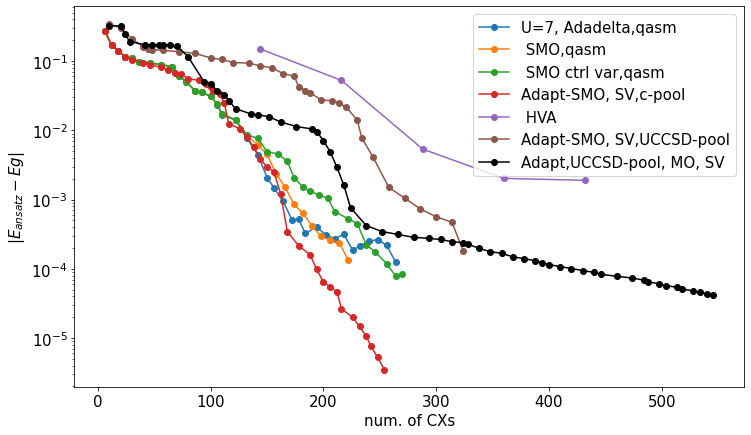

In [30]:
figure,ax=plt.subplots(1,figsize = (12,7))
ax.set_xlabel("num. of CXs",fontsize=15)
ax.set_ylabel(r'$|E_{ansatz}-Eg|$',fontsize=15)
ax.plot(numCXarr,numpy.abs(numpy.array(EnergyArrAdapt)-Eg),marker='o',linestyle='-',label='U='+str(U)+r', Adadelta,qasm')
ax.plot(numCXarr1,numpy.abs(numpy.array(EnergyArrAdapt1)-Eg),marker='o',linestyle='-',label=r' SMO,qasm ')
ax.plot(numCXarr2,numpy.abs(numpy.array(EnergyArrAdapt2)-Eg),marker='o',linestyle='-',label=r' SMO ctrl var,qasm')
ax.plot(CXarr,numpy.abs(numpy.array(Earr[1:])-Eg),marker='o',linestyle='-',label=r'Adapt-SMO, SV,c-pool')
ax.plot(numCXarrHVA[:-3],numpy.abs(numpy.array(EnergyArrHVA[:-2])-Eg),marker='o',linestyle='-',label=r' HVA')
ax.plot(numCXarrUCCSD[:-2],numpy.abs(numpy.array(EnergyArrAdaptUCCSD)-Eg),marker='o',linestyle='-',label=r'Adapt-SMO, SV,UCCSD-pool')
ax.plot(CXarrUCCSD1,numpy.abs(numpy.array(EarrUCCSD1)-Eg),marker='o',linestyle='-',color='k',label=r'Adapt,UCCSD-pool, MO, SV')
ax.set_yscale('log')
ax.tick_params(labelsize=15)
ax.legend(fontsize=15)
    #ax[1].set_yscale('log')
    #ax[1].tick_params(labelsize=15)
    #ax[1].legend(fontsize=15)
plt.savefig("../"+str(U)+"/CX-U-%s.png"%str(U)) 
